# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanium.csv')

In [3]:
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [4]:
Average_X = np.mean(df['x'])
print(Average_X)
StandartDeviation_X = np.std(df['x'])
print(StandartDeviation_X)

825.0
141.4213562373095


In [5]:
for i in df.index:
    df.loc[i,'x'] = (df.loc[i,'x'] - Average_X)/ StandartDeviation_X

In [6]:
df

,x,y
0,-1.697056,0.644
1,-1.626346,0.622
2,-1.555635,0.638
3,-1.484924,0.649
4,-1.414214,0.652
5,-1.343503,0.639
6,-1.272792,0.646
7,-1.202082,0.657
8,-1.131371,0.652
9,-1.060660,0.655


In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

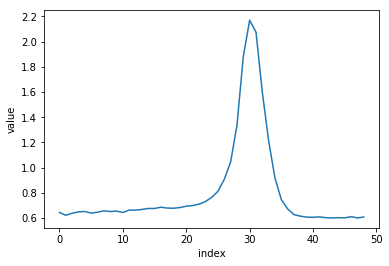

In [8]:
plt.plot(df['y'])
plt.xlabel('index')
plt.ylabel('value')

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [9]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [10]:
C = np.logspace(-5,5,9)
C

array([  1.00000000e-05,   1.77827941e-04,   3.16227766e-03,
         5.62341325e-02,   1.00000000e+00,   1.77827941e+01,
         3.16227766e+02,   5.62341325e+03,   1.00000000e+05])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df['x'],df['y'],test_size = 0.3,shuffle=True)

In [12]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [13]:
result_line = dict.fromkeys(C)
for i in C:
    SVR_Line = SVR(C = i,kernel='linear',tol=0.01)
    SVR_Line.fit(X_train,y_train)
    y_hat_line = SVR_Line.predict(X_test)
    mistake = mean_absolute_error(y_test,y_hat_line)
    result_line[i] = mistake
result_line

{1.0000000000000001e-05: 0.22630609166671173,
 0.00017782794100389227: 0.22696775332487501,
 0.0031622776601683794: 0.23123675999176477,
 0.056234132519034911: 0.23484224759562469,
 1.0: 0.23424442882561922,
 17.782794100389228: 0.2342441599062291,
 316.22776601683796: 0.2343145390552045,
 5623.4132519034911: 0.23454661101696164,
 100000.0: 0.22883098637019555}

In [14]:
x_line = []
y_line = []
for key in result_line:
    y_line.append(result_line[key])
    x_line.append(key)
print(x_line)
print(y_line)

[1.0000000000000001e-05, 0.00017782794100389227, 0.0031622776601683794, 0.056234132519034911, 1.0, 17.782794100389228, 316.22776601683796, 5623.4132519034911, 100000.0]
[0.22630609166671173, 0.22696775332487501, 0.23123675999176477, 0.23484224759562469, 0.23424442882561922, 0.2342441599062291, 0.2343145390552045, 0.23454661101696164, 0.22883098637019555]


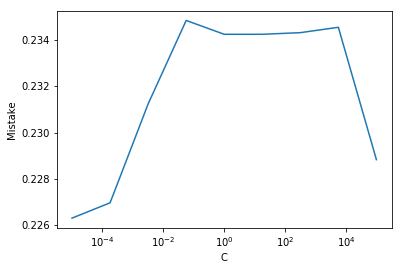

In [15]:
plt.plot(x_line,y_line)
plt.semilogx()
plt.xlabel('C')
plt.ylabel('Mistake')

In [16]:
result_poli = dict.fromkeys(C)
for i in C:
    SVR_Poli = SVR(C=i,degree=3,gamma=6,coef0=1,tol=0.01,kernel='poly')
    SVR_Poli.fit(X_train,y_train)
    y_hat_poli = SVR_Poli.predict(X_test)
    mistake = mean_absolute_error(y_hat_poli,y_test)
    result_poli[i] = mistake
result_poli

{1.0000000000000001e-05: 0.23451869408088194,
 0.00017782794100389227: 0.23434639095414178,
 0.0031622776601683794: 0.22973615716912493,
 0.056234132519034911: 0.23371175308855255,
 1.0: 0.23461371071451964,
 17.782794100389228: 0.23501452041736537,
 316.22776601683796: 0.23449389888588942,
 5623.4132519034911: 0.53031945477629716,
 100000.0: 0.63997141174636318}

In [17]:
x_poli = []
y_poli = []
for key in result_poli:
    y_poli.append(result_poli[key])
    x_poli.append(key)
print(x_poli)
print(y_poli)

[1.0000000000000001e-05, 0.00017782794100389227, 0.0031622776601683794, 0.056234132519034911, 1.0, 17.782794100389228, 316.22776601683796, 5623.4132519034911, 100000.0]
[0.23451869408088194, 0.23434639095414178, 0.22973615716912493, 0.23371175308855255, 0.23461371071451964, 0.23501452041736537, 0.23449389888588942, 0.53031945477629716, 0.63997141174636318]


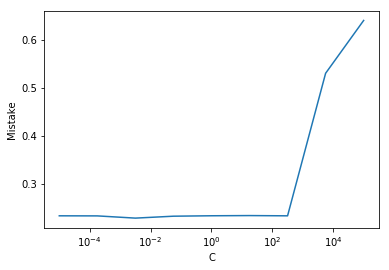

In [18]:
plt.plot(x_poli,y_poli)
plt.semilogx()
plt.xlabel('C')
plt.ylabel('Mistake')

In [19]:
result_rbf = dict.fromkeys(C)
for i in C:
    SVR_RBF = SVR(C = i,gamma=6,coef0=1,tol = 0.01,kernel='rbf')
    SVR_RBF.fit(X_train,y_train)
    y_hat_rbf = SVR_RBF.predict(X_test)
    mistake = mean_absolute_error(y_hat_rbf,y_test)
    result_rbf[i] = mistake
result_rbf

{1.0000000000000001e-05: 0.22676116742351937,
 0.00017782794100389227: 0.22666887475806988,
 0.0031622776601683794: 0.22502765329140678,
 0.056234132519034911: 0.21433095680668296,
 1.0: 0.13489697323174601,
 17.782794100389228: 0.076928663615807066,
 316.22776601683796: 0.083048309283103125,
 5623.4132519034911: 0.083048309283103125,
 100000.0: 0.083048309283103125}

In [20]:
x_rbf = []
y_rbf = []
for key in result_rbf:
    y_rbf.append(result_rbf[key])
    x_rbf.append(key)
print(x_rbf)
print(y_rbf)

[1.0000000000000001e-05, 0.00017782794100389227, 0.0031622776601683794, 0.056234132519034911, 1.0, 17.782794100389228, 316.22776601683796, 5623.4132519034911, 100000.0]
[0.22676116742351937, 0.22666887475806988, 0.22502765329140678, 0.21433095680668296, 0.13489697323174601, 0.076928663615807066, 0.083048309283103125, 0.083048309283103125, 0.083048309283103125]


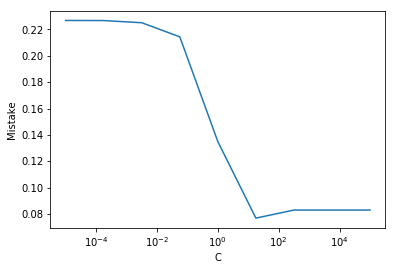

In [21]:
plt.plot(x_rbf,y_rbf)
plt.semilogx()
plt.xlabel('C')
plt.ylabel('Mistake')

### For best parametrs

In [22]:
Min_dict = dict.fromkeys(['Line','Poli','RBF'])
Min_dict['Line'] = min(y_line)
Min_dict['Poli'] = min(y_poli)
Min_dict['RBF'] = min(y_rbf)
Min_dict

{'Line': 0.22630609166671173,
 'Poli': 0.22973615716912493,
 'RBF': 0.076928663615807066}

#### Linear

In [23]:
for key in result_line:
    if result_line[key] == Min_dict['Line']:
        Best_C_Line = key
Best_C_Line

1.0000000000000001e-05

In [24]:
SVR_Best_Line = SVR(C = Best_C_Line,kernel='linear',tol=0.01)

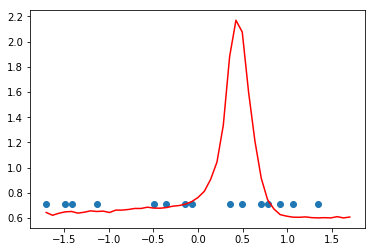

In [25]:
SVR_Best_Line.fit(X_train,y_train)
y_hat_best_Line = SVR_Best_Line.predict(X_test)
plt.scatter(X_test,y_hat_best_Line)
plt.plot(df['x'],df['y'],c = 'red')

#### Polinomian

In [26]:
for key in result_poli:
    if result_poli[key] == Min_dict['Poli']:
        Best_C_Poli = key
Best_C_Poli

0.0031622776601683794

In [27]:
SVR_Best_Poli = SVR(C = Best_C_Poli,degree=3,gamma=6,coef0=1,tol=0.01,kernel='poly')

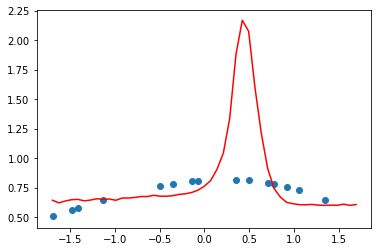

In [28]:
SVR_Best_Poli.fit(X_train,y_train)
y_hat_best_Poli = SVR_Best_Poli.predict(X_test)
plt.scatter(X_test,y_hat_best_Poli)
plt.plot(df['x'],df['y'],c = 'red')

##### RBF

In [29]:
for key in result_rbf:
    if result_rbf[key] == Min_dict['RBF']:
        Best_C_RBF = key
Best_C_RBF

17.782794100389228

In [30]:
SVR_Best_RBF = SVR(kernel='rbf',C = Best_C_RBF,gamma=6,coef0=1,tol = 0.01)

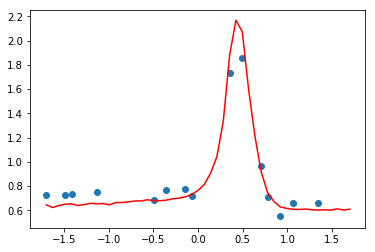

In [31]:
SVR_Best_RBF.fit(X_train,y_train)
y_hat_best_RBF = SVR_Best_RBF.predict(X_test)
plt.scatter(X_test,y_hat_best_RBF)
plt.plot(df['x'], df['y'], c='r')
#plt.scatter(X_train, y_train)

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [32]:
df_en = pd.read_csv('war_and_peace_en.txt',header=None)
df_es = pd.read_csv('war_and_peace_es.txt',header=None)

In [33]:
df_en.columns = ['word']
df_es.columns = ['word']
df_es['label'] = 0
df_en['label'] = 1

In [34]:
df_lang = pd.DataFrame()
words = list(df_en['word']) + list(df_es['word'])
len(words)

11403

In [35]:
df_lang = pd.DataFrame()
df_lang['word'] = words
df_lang['label'] = 0
df_lang['label'][:len(df_en)] = 1

C:\Users\Gleb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
RND_SEED = 123

In [37]:
X_train,X_test,y_train,y_test = train_test_split(df_lang['word'],df_lang['label'],test_size = 0.2, random_state=RND_SEED)
C_p = np.logspace(-3,1.5,9)
N_gramms = np.linspace(1,3,3)
result_q = 0

In [38]:
C_p

array([  1.00000000e-03,   3.65174127e-03,   1.33352143e-02,
         4.86967525e-02,   1.77827941e-01,   6.49381632e-01,
         2.37137371e+00,   8.65964323e+00,   3.16227766e+01])

In [40]:
qul_1 = []
qul_2 = []
qul_3 = []

for i in (1, 2, 3):
    for j in C_p:
        svc = SVC(C = j,kernel='linear')
        CV = CountVectorizer(analyzer='char',ngram_range=(i,i))
        Pipe = Pipeline([('Count_Vect',CV),('SVM',svc)])
        Pipe.fit(X_train, y_train)
        y_hat = Pipe.predict(X_test)
        mistake_q = accuracy_score(y_hat,y_test)
        if mistake_q > result_q:
            C_p_best = j
            result_q = mistake_q
            n_gr = i

        if i==1:
            qul_1.append(mistake_q)
        if i==2:
            qul_2.append(mistake_q)
        if i==3:
            qul_3.append(mistake_q)
    

<function matplotlib.pyplot.semilogx>

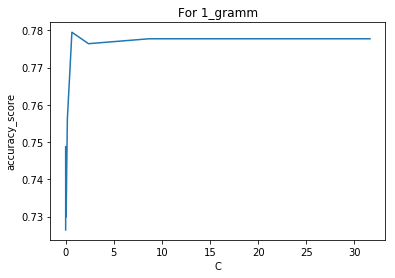

In [41]:
plt.plot(C_p,qul_1)
plt.title('For 1_gramm')
plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.semilogx

<function matplotlib.pyplot.semilogx>

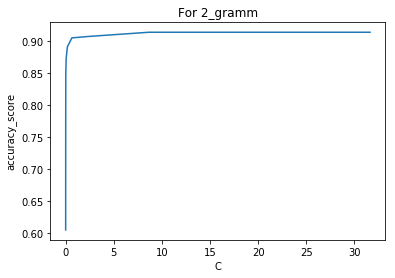

In [42]:
plt.plot(C_p,qul_2)
plt.title('For 2_gramm')
plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.semilogx

<function matplotlib.pyplot.semilogx>

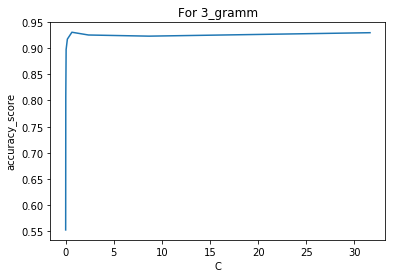

In [43]:
plt.plot(C_p,qul_3)
plt.title('For 3_gramm')
plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.semilogx

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

**вследствие того, что все работало крайне медленно, я решил пойти немного другим путем и вместо того, чтоб использовать индексы, чтобы находить слова, я решил работать напрямую с ними, заранее вычислив матрицу для ядра**

In [44]:
RND_SEED = 123
df = df_lang.sample(n=df_lang.shape[0])
df = df.reset_index()
df.index = df['index']
X_train,X_test,y_train,y_test = train_test_split(df['word'],df['label'],test_size = 0.2)
X_train, X_test, y_train, y_test = list(X_train), list(X_test), np.array(y_train), np.array(y_test)

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [45]:
def wfi_levenshtein(string_1, string_2):
    if string_1 == string_2:
        return 0
    len_1 = len(string_1)
    len_2 = len(string_2)
    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1
    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2
    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]
    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]
            if string_1[i] != string_2[j]:
                # substitution
                cost += 1
                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost
                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost
            d1[j + 1] = cost
        d0, d1 = d1, d0
    return d0[-1]

In [46]:
def string_kernel(U,V):
    
    G = np.zeros((len(U),len(V)))

    for i in (range(len(U))):
        for j in range(len(V)):
            G[i][j] = np.exp(-(wfi_levenshtein(U[i],V[j]))**2)
    return G

In [47]:
kernel_train = string_kernel(X_train[:6500], X_train[:6500])
kernel_test = string_kernel(X_test[:1500], X_train[:6500])

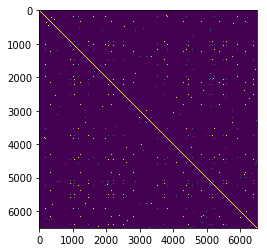

In [48]:
plt.imshow(kernel_train)

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [49]:
C_last = np.logspace(-3, 3, 10)

In [50]:
accuracy_train = []
accuracy_test = []
for i in C_last:
    svc_lev = SVC(kernel='precomputed',C = i)
    svc_lev.fit(kernel_train, y_train[:6500])
    y_hat_train = svc_lev.predict(kernel_train)
    accuracy_train.append(accuracy_score(y_hat_train, y_train[:6500]))
    y_hat_test = svc_lev.predict(kernel_test)
    accuracy_test.append(accuracy_score(y_hat_test,y_test[:1500]))

In [51]:
accuracy_test

[0.57333333333333336,
 0.57333333333333336,
 0.68066666666666664,
 0.75600000000000001,
 0.85933333333333328,
 0.89533333333333331,
 0.89666666666666661,
 0.89666666666666661,
 0.89666666666666661,
 0.89666666666666661]

In [52]:
max(accuracy_test)

0.89666666666666661

In [53]:
accuracy_train

[0.54830769230769227,
 0.54830769230769227,
 0.65923076923076918,
 0.75938461538461544,
 0.90892307692307694,
 0.98661538461538456,
 0.98676923076923073,
 0.98676923076923073,
 0.98676923076923073,
 0.98676923076923073]

In [54]:
max(accuracy_train)

0.98676923076923073